In [1]:
%pylab inline
import json
import ipywidgets
import time

Populating the interactive namespace from numpy and matplotlib


In [2]:
network = [[1,2,3], [0, 2], [0,1], [0]]
deg = [len(l) for l in network]

m = 1

def evolve(m): # ads a new nod to the network, with m new links  
    '''
    @summary: ads a new nod to the network, with 'm' new links
    @param m: number of new links with which the new node join to the exsiting network
    @type m: int
    '''
    deg = [len(l) for l in network]
    s = cumsum(deg)
    new = []
    while len(new) < m:
        r = random.uniform(high = s[-1])
        i = 0 if r < s[0] else int(argwhere(s > r)[0][0])
        if i in new:
            continue
        new.append(i)
    network.append(new)
    deg.append(m)
    N = len(network) - 1
    for n in new:
        try:
            network[n].append(N)
            deg[n] += 1
        except:
            print('ERROR')

def adjlist(filename, network):
    '''
    @summary: saving to adjlist for visualisation with networkx
    @param filename: the name of the output file (like: "adjlist.txt")
    @type filename: str
    @param network: the list of list which stores the network (like: [[1, 2], [0], [0]])
    @type network: list
    '''
    with open(filename, 'w') as f:
        for i, l in enumerate(network):
            f.write('%d %s\n' %(i, ' '.join(map(lambda x: str(x), l))))

def load(SIZE, m):
    '''
    @summary: ads 'SIZE' new nodes to the network
    @param SIZE: the number of nodes to add to the network
    @type SIZE: int
    @param m: number of new links with which the new node join to the exsiting network
    @type m: int
    '''
    pb = ipywidgets.IntProgress(max = SIZE - 1)
    display(pb)
    for i in range(SIZE):
        if i % 50:
            pb.value = i
            pass
        evolve(m)

In [10]:
start = time.time()
network = [[1,2,3], [0, 2], [0,1], [0]]
m = 4
load(10000, m)
print(time.time() - start)
#saving to txt:
with open("network_m"+str(m)+".txt", "w") as output:
    json.dump(network, output)
# a smaller one for visualisation:
network = [[1,2,3], [0, 2], [0,1], [0]]
m = 4
load(100, m)
# saving to adjlist for visualisation
adjlist("adjlist.txt", network)

A Jupyter Widget

45.078978061676025


A Jupyter Widget

In [6]:
deg = [len(l) for l in network]
H = {}
for d in deg:
    if d in H:
        H[d] += 1
    else:
        H[d] = 1
x = list(H.keys())
y = list(H.values())

Text(0,0.5,'Number of nodes')

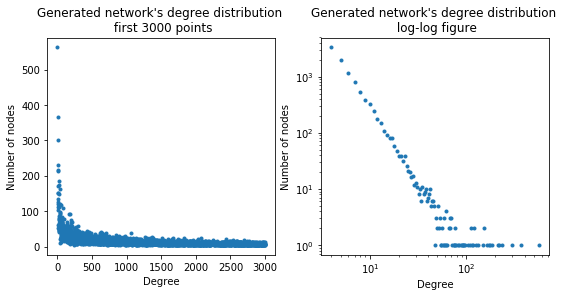

In [9]:
figsize(9,4) #ábraméret nagyítása vízszintesen
subplot(1,2,2)
loglog(H.keys(), H.values(), '.')
title('Generated network\'s degree distribution \n log-log figure')
xlabel('Degree')
ylabel('Number of nodes')
subplot(1,2,1)
plot(deg[:3000], '.')
title('Generated network\'s degree distribution \n first 3000 points')
xlabel('Degree')
ylabel('Number of nodes')